### In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)

### Introduction to Tensors

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2025-06-15 22:44:21.112481: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-15 22:44:21.217788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750007661.256357    7978 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750007661.268344    7978 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750007661.358307    7978 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0


In [2]:
# Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

I0000 00:00:1750007662.712114    7978 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21623 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a scalar tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the number of dimensions of a vector tensor
vector.ndim

1

In [6]:
# Create a matrix (has more than one dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
# Check the dimensions of matrix tensor
matrix.ndim

2

In [8]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [9., 9.]], dtype=tf.float16)  # Specify the datatype with dtype parameter
another_matrix

2025-06-15 22:44:22.963074: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 9.,  9.]], dtype=float16)>

In [9]:
# What's the number of dimensions
another_matrix.ndim

2

In [10]:
# Lets create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                       [[7, 8, 9],
                        [10, 11, 12]],
                        [[13, 14, 15],
                         [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
tensor.ndim

3

What we've created so far:

* Scalar: a single number.
* Vector: a number with direction (e.g. windspeed and direction)
* Tensor: an n-dimensional array of numbers (where na can be any number, a 0-dimensional tensor is a scalar, a 1-deminsional tensor is a vector)

### Creating tensors with `tf.variable`

In [12]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [13]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Let's try to change one of the elements in our changeable tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [15]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [16]:
# Lets try change our unchangable tensor
unchangeable_tensor[0].assign(7)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Creating random tensors

Random tensors are tensort of some arbitrary size which contain random numbers

A use case how a random tensor can be used.

![Screenshot from 2025-06-15 12-13-56.png](<attachment:Screenshot from 2025-06-15 12-13-56.png>)
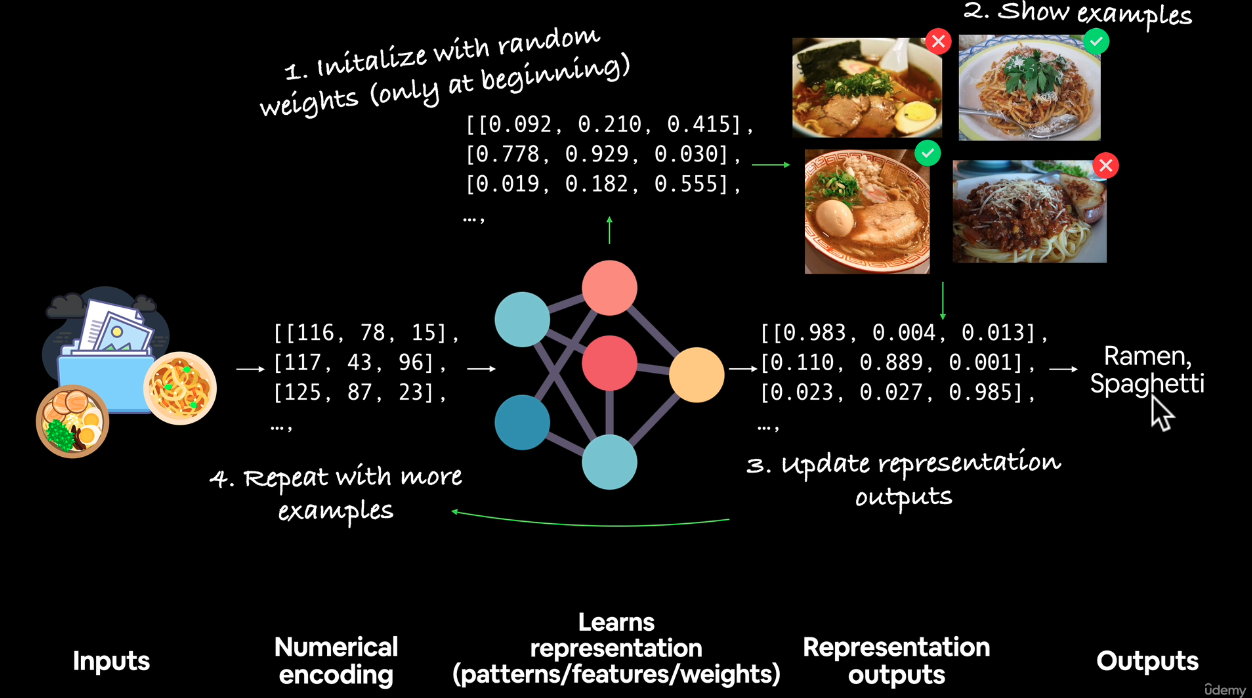

In [17]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)  # set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [18]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_2 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [19]:
# Are they equal?
random_1 == random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

In [20]:
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [21]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled.ndim

2

In [22]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [23]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>